<a href="https://colab.research.google.com/github/matthias-wright/flaxmodels/blob/main/resnet_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip
!pip install --upgrade jax jaxlib==0.1.66+cuda111 -f https://storage.googleapis.com/jax-releases/jax_releases.html
!pip install --upgrade git+https://github.com/matthias-wright/flaxmodels.git

Looking in links: https://storage.googleapis.com/jax-releases/jax_releases.html
  Cloning https://github.com/matthias-wright/flaxmodels.git to /tmp/pip-req-build-7ctl1hng
  Running command git clone -q https://github.com/matthias-wright/flaxmodels.git /tmp/pip-req-build-7ctl1hng
     |████████████████████████████████| 179 kB 5.9 MB/s 
     |████████████████████████████████| 720 kB 37.2 MB/s 
     |████████████████████████████████| 75 kB 4.0 MB/s 
  Created wheel for flaxmodels: filename=flaxmodels-0.1.0-py3-none-any.whl size=95003 sha256=ee24ec5b027742a5b10b642efc192ab63552037aae5f1e9dfd735789cccc6258
  Stored in directory: /tmp/pip-ephem-wheel-cache-5nxbzovm/wheels/13/5e/c0/a0c35cd00aa72decae21fda1342e486558b9509e572d0b2a39
Successfully built flaxmodels
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Unin

<h2><b>Download example image and labels.</b></h2>

In [ ]:
import requests
import json

response = requests.get('https://cdn.pixabay.com/photo/2013/05/29/22/25/elephant-114543_960_720.jpg')
with open('example.jpg', 'wb') as f:
    f.write(response.content)

response = requests.get('https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json')
with open('labels.json', 'w') as f:
    f.write(response.text)

labels = json.load(open('labels.json'))

<h1><b>Get classifier scores</b></h1>

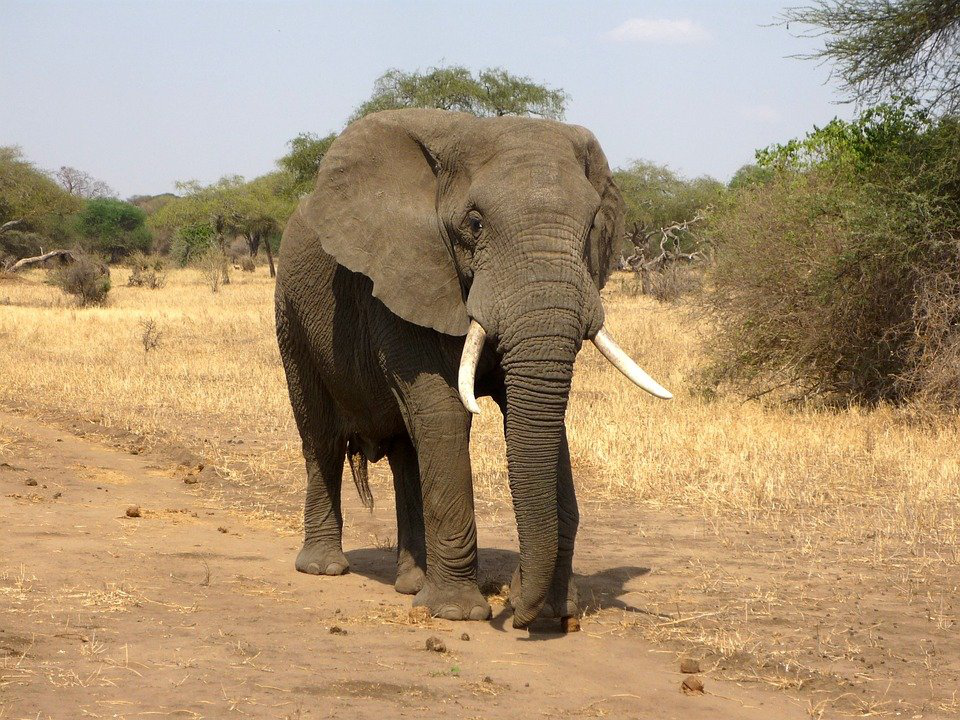

Downloading: "https://www.dropbox.com/s/wx3vt76s5gpdcw5/resnet18_weights.h5" to /tmp/flaxmodels/resnet18_weights.h5


100%|██████████| 46.9M/46.9M [00:04<00:00, 11.6MiB/s]


1. African bush elephant
2. tusker
3. Asian elephant
4. warthog
5. water buffalo


In [ ]:
from PIL import Image
import jax
import jax.numpy as jnp
import flaxmodels as fm

key = jax.random.PRNGKey(0)

# Load image
img = Image.open('example.jpg')
display(img)

# Image should be in range [0, 1]
x = jnp.array(img, dtype=jnp.float32) / 255.0
# Add batch dimension
x = jnp.expand_dims(x, axis=0)

# Init network
resnet18 = fm.ResNet18(output='logits', pretrained='imagenet')
params = resnet18.init(key, x)

# Compute predictions
out = resnet18.apply(params, x)

# Get top 5 classes
_, top5_classes = jax.lax.top_k(out, k=5)
top5_classes = jnp.squeeze(top5_classes, axis=0)

for i in range(top5_classes.shape[0]):
    print(f'{i + 1}.', labels[top5_classes[i]])